In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
%matplotlib inline

In [2]:
sms = pd.read_csv('spam.csv',encoding = 'Windows-1252')

In [3]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
sms.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
sms.rename(columns={'v1':'label','v2':'msg'},inplace=True)

In [7]:
sms.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
sms['label'] = encoder.fit_transform(sms['label'])

In [10]:
sms.head()

,label,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
sms.duplicated().sum()

403

In [12]:
# remove duplicates
sms = sms.drop_duplicates(keep='first')

In [13]:
sms.duplicated().sum()

0

In [14]:
sms.shape

(5169, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

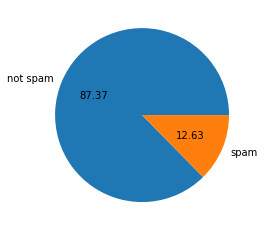

In [15]:
plt.pie(sms['label'].value_counts(),autopct="%0.2f",labels=['not spam','spam'])
plt.show

# Data PreProcessing

1. Remove stop words , punctuations and symbols from tweet
2. stem word in each tweet to keep only single version of eac word
3. Create dictionary which stores each word and its label with their occurance frequency

In [16]:
#function process_msg() to remove stop words , punctuations and symbols
def process_msg(msg):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # tokenize msg
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    msg_tokens = tokenizer.tokenize(msg)
    msg_clean = ''
    for word in msg_tokens:
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            stem_word = stemmer.stem(word)  # stemming word
            msg_clean =msg_clean +  ' ' + stem_word 

    return msg_clean

In [17]:
custom_msg = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

# print cleaned tweet
print(process_msg(custom_msg))

 go jurong point crazi .. avail bugi n great world la e buffet ... cine got amor wat ...


In [18]:
sms['msg'] = sms['msg'].apply(process_msg)

In [19]:
sms.head()

,label,msg
0,0,go jurong point crazi .. avail bugi n great w...
1,0,ok lar ... joke wif u oni ...
2,1,free entri 2 wkli comp win fa cup final tkt 2...
3,0,u dun say earli hor ... u c alreadi say ...
4,0,nah think goe usf live around though


# Naive Bayes

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB,BernoulliNB


In [21]:
mnb = MultinomialNB()
bnb = BernoulliNB()

# Model Testing

In [22]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import time
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [23]:
X = tfidf.fit_transform(sms['msg']).toarray()
y = sms['label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
begin = time.time() 
mnb.fit(X_train,y_train)
end = time.time()
y_pred1 = mnb.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix:','\n',confusion_matrix(y_test,y_pred2))
print("Time required for Training = ",end-begin," seconds")


NameError: name 'y_pred2' is not defined

In [ ]:
begin = time.time() 
bnb.fit(X_train,y_train)
end = time.time()
y_pred2 = mnb.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix:','\n',confusion_matrix(y_test,y_pred2))
print("Time required for Training = ",end-begin," seconds")

In [ ]:
mnb_scores = cross_val_score(mnb,X,y,cv = 5)
bnb_scores = cross_val_score(bnb,X,y,cv = 5)
res = pd.DataFrame([mnb_scores,bnb_scores],index = ['Accuracy for MultinomialNB','Accuracy for BernolliNB'])
print(res)
print()
print('Overall Accuracy for MultinomialNB = ', mnb_scores.mean())
print('Overall Accuracy for BernolliNB = ', mnb_scores.mean())

In [ ]:
mnb_prec = cross_val_score(mnb,X,y,cv = 10,scoring='precision')
bnb_prec = cross_val_score(bnb,X,y,cv = 10,scoring='precision')
mnb_rec = cross_val_score(mnb,X,y,cv = 10,scoring='recall')
bnb_rec = cross_val_score(bnb,X,y,cv = 10,scoring='recall')
mnb_f1 = cross_val_score(mnb,X,y,cv = 10,scoring='f1')
bnb_f1 = cross_val_score(bnb,X,y,cv = 10,scoring='f1')

In [ ]:
res = pd.DataFrame([[mnb_prec.mean(),mnb_rec.mean(),mnb_f1.mean()],
                    [mnb_prec.mean(),mnb_rec.mean(),mnb_f1.mean()]],
                   index = ['MultinomialNB', 'BernolliNB'], columns = ['Precision','Recall','F1'])
print(res)